# 学習したモデルのパラメータを保存する

/Users/rd_bigdata01/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


トレーニングデータに対する正解率： 0.96
テストデータに対する正解率： 0.96
model : SVC


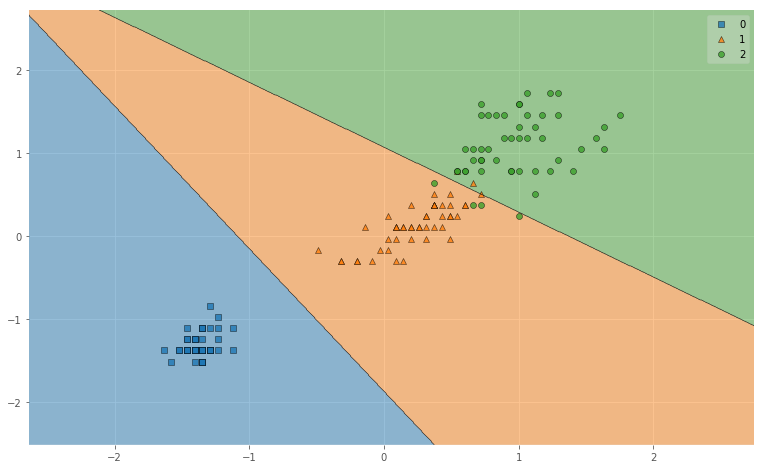

In [1]:
# irisデータセットに対してSVCでモデルを作る
# 他プログラムと同じため、説明は割愛する

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

RANDOM_SEED=71

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 

iris = datasets.load_iris()

# print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# petal length, petal widthを使う
X = iris.data[:, [2,3]]
y = iris.target

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED) )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=RANDOM_SEED)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#配列データの結合（教師データ＋試験データ）
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 可視化
fig = plt.figure(figsize=(13,8))

# model名の取得
# <class 'sklearn.linear_model.logistic.LogisticRegression'>
# -> LogisticRegression
model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
print("model : " + model_title)

# 分類器の決定境界を引いてくれる神機能(mlxtendに含まれる機能の１つ)
# データとターゲット，分類器を渡すだけで描いてくれる
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()

# 予測モデルの保存

In [8]:
from sklearn.externals import joblib

# 予測モデルをシリアライズ
joblib.dump(model, './model/13-svc-model.pkl') 

# 予測結果を出力
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(model.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 予測モデルの復元

In [12]:
from sklearn import datasets
from sklearn.externals import joblib

# データセットを再読み込み
iris = datasets.load_iris()

model = SVC(kernel='linear', random_state=RANDOM_SEED)
# print(model.predict(iris.data))
## NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# 予測モデルを復元
model = joblib.load('./model/13-svc-model.pkl') 

# 予測結果を出力
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(model.predict(X))



[[-1.34127240e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.39813811e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.17067529e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.44444970e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.44444970e+00]
 [-1.51186952e+00 -1.44444970e+00]
 [-1.45500381e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.05003079e+00]
 [-1.39813811e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.17067529e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.18150376e+00]
 [-1.17067529e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.05003079e+00]
 [-1.56873522e+00 -1.31297673e+00]
 [-1.17067529e+00 -9.18557817e-01]
 [-1.05694388e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.05003079e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1

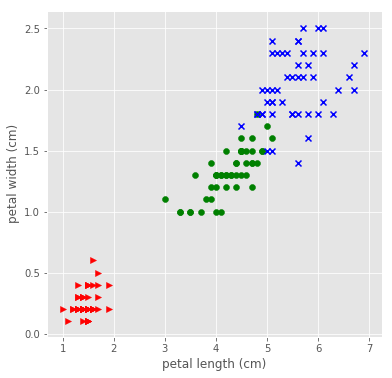

In [45]:
features = iris.data
# 各特徴量の名前
feature_names = iris.feature_names
# データと品種の対応
targets = iris.target

plt.figure(figsize=(6,6))

for i in range(len(features)):
    if(targets[i] == 0):
        marker = '>'
        c = 'r'
    elif(targets[i] == 1):
        marker = 'o'
        c = 'g'
    elif(targets[i] == 2):
        marker = 'x'
        c = 'b'
    plt.scatter(
        features[i,2],
        features[i,3],
        marker=marker,
        c=c,
    )

plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.grid(True)
    
plt.show()

# 簡易な判定器サンプルを作る

In [47]:
# ([データ] - 平均値 )/標準偏差　= 標準化
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
mean = X.mean()
std = X.std()
petal_length_mean = X[:,0].mean()
petal_width_mean  = X[:,1].mean()
petal_length_std  = X[:,0].std()
petal_width_std   = X[:,1].std()

# 簡易な判定器サンプル
def predict_judge(petal_length, petal_width):
    print("petal_length : " , petal_length , ", petal_width : " , petal_width)
    
    #入力された葉のサイズを標準化
    #ここをうまいやり方考えないとダメ
    data_x1 = (petal_length - petal_length_mean) / petal_length_std
    data_x2 = (petal_width - petal_width_mean) / petal_width_std
    X = [[data_x1, data_x2]]
    print(X)
    
    # 予測モデルを復元
    model = joblib.load('./model/13-svc-model.pkl') 
    #判定器で分類する
    judge = model.predict(X)
    #分類された葉の名前を返答する
    return(iris.target_names[judge])

# 判定器にpetal_length, petal_widthのサイズを投げて判定させる
predict = predict_judge(2.0, 0.5)
print(predict)
predict = predict_judge(4.0, 1.0)
print(predict)
predict = predict_judge(6.0, 2.0)
print(predict)

petal_length :  2.0 , petal_width :  0.5
[[-1.0000781808243175, -0.9185578172020242]]
['setosa']
petal_length :  4.0 , petal_width :  1.0
[[0.13723589896072927, -0.2611929671051558]]
['versicolor']
petal_length :  6.0 , petal_width :  2.0
[[1.274549978745776, 1.053536733088581]]
['virginica']


In [33]:
# 標準化の動作確認
print("----L1----")
l = np.array([10, 20, 30, 40, 50])
print("mean : " , l.mean()) #平均

print("----L2----")
l2 = l - l.mean()
print(l2)
print("mean : " , l2.mean())
print("std  : " , l2.std()) #標準偏差

print("----L3----")
l3 = l2 / l2.std()
print("std  : " , l3.std()) #標準偏差

print("---iris---")
# ([データ] - 平均値 )/標準偏差　= 標準化
iris = datasets.load_iris()
X = iris.data[:, [2,3]]

print("petal_length_mean : " , X[:,0].mean())
print("petal_width_mean  : " , X[:,1].mean())
print("petal_length_std  : " , X[:,0].std())
print("petal_width_std   : " , X[:,1].std())

----L1----
mean :  30.0
----L2----
[-20. -10.   0.  10.  20.]
mean :  0.0
std  :  14.142135623730951
----L3----
std  :  0.9999999999999999
---iris---
petal_length_mean :  3.758666666666666
petal_width_mean  :  1.1986666666666668
petal_length_std  :  1.7585291834055212
petal_width_std   :  0.7606126185881716
